### Imports

In [3]:
##import lib.degree
##import lib.plot

# import lib.positions
# import lib.distance
# import lib.distributions
import lib.imports
import lib.geometry
import lib.graphs
import lib.neurites

import lib.positions
import lib.xyz
from lib.bidirectional import bidirectionalSubgraph, bidirectionalSubgraphArray

from lib.plot import multiBarPlot
from lib.degree import degreeSequence, avgDegDist
from lib.distance import distanceSequence, avgDistDist
from lib.distributions import createDistributions



import matplotlib.pyplot as plt

import itertools


In [4]:
%config InlineBackend.figure_format ='retina'

### Move Graphs into Memory

In [5]:
from lib.graphs import G_Witvliet, G_White, G_SEEM_FC, G_overlap, G_uniqueOG, G_uniqueSEEM
G_W1 = G_Witvliet[0]
G_W7 = G_Witvliet[6]
G_W8 = G_Witvliet[7]

%store -r G_overlap_W1
%store -r G_uniqueOG_W1
%store -r G_uniqueSEEM_W1

%store -r RDDAM_Graphs_W1
%store -r RDDAM_Graphs_W7
%store -r RDDAM_Graphs_W8
%store -r RDDAM_Graphs_White

%store -r rand_Graphs_W1
%store -r rand_Graphs_W7
%store -r rand_Graphs_W8
%store -r rand_Graphs_White

%store -r SEEM_White
%store -r SEEM_Array_Witvliet
%store -r SEEM_Array_Witvliet_Rand
%store -r SEEM_White_Rand

%store -r G_overlap_W1_rddam
%store -r G_1of3
%store -r G_2of3
%store -r G_overlap_W7_W8_White




no stored variable or alias G_overlap_W1
no stored variable or alias G_uniqueOG_W1
no stored variable or alias G_uniqueSEEM_W1
no stored variable or alias G_overlap_W1_rddam
no stored variable or alias G_1of3
no stored variable or alias G_2of3
no stored variable or alias G_overlap_W7_W8_White


In [6]:
import networkx as nx
nx.average_node_connectivity(G_W1)

1.683206106870229

In [7]:
# cenn = plot3D(G_W1, '')

Degree Distribution Graphs (W1)

In [8]:
sum(dict(G_W1.degree()).values())/len(dict(G_W1.degree()).values())

8.122137404580153

In [9]:
from lib.style import color, lines, markers
from lib.distributions import wass
def multiLinePlot(data, labels, title, figsize, save=None):

  rows = 2
  cols = 1
  fig,axes = plt.subplots(rows, cols, figsize=figsize, sharey=False, sharex=False, gridspec_kw={'height_ratios': [4, 1]}, layout="constrained")

  plt.rcParams.update({'font.size': 9, 'font.family': 'Times New Roman'})
  fig.suptitle(title, fontsize=9)
  maxX, maxY = 0, 0

  for (x,y), sub in zip(data, labels):
    # x,y = data[i]
    if x[-1] > maxX:
      maxX = max(x)
    if max(y) > maxY:
      maxY = max(y)
    axes[0].plot(x,y,
             color=color[sub],
             label=sub, 
             linestyle=lines[sub],
            #  linestyle='dotted',
            #  marker=markers[sub],
             linewidth=2)
  
  # axes[0].set_xlim(0,maxX)
  # axes[0].set_ylim(0,maxY)
  axes[0].legend(loc='lower center', fontsize=9, bbox_to_anchor=(0.35, 0))
  axes[0].set_yscale('log')

  wassVals = [wass(data[0], dat) for dat in data[1:]]
  axes[1].barh(labels[1:], wassVals, color=[color[k] for k in labels[1:]])
  axes[1].xaxis.set_major_locator(plt.MaxNLocator(4))
  
  if save:
    plt.savefig(save, format='pgf', dpi=300)

  plt.show()
  plt.clf()

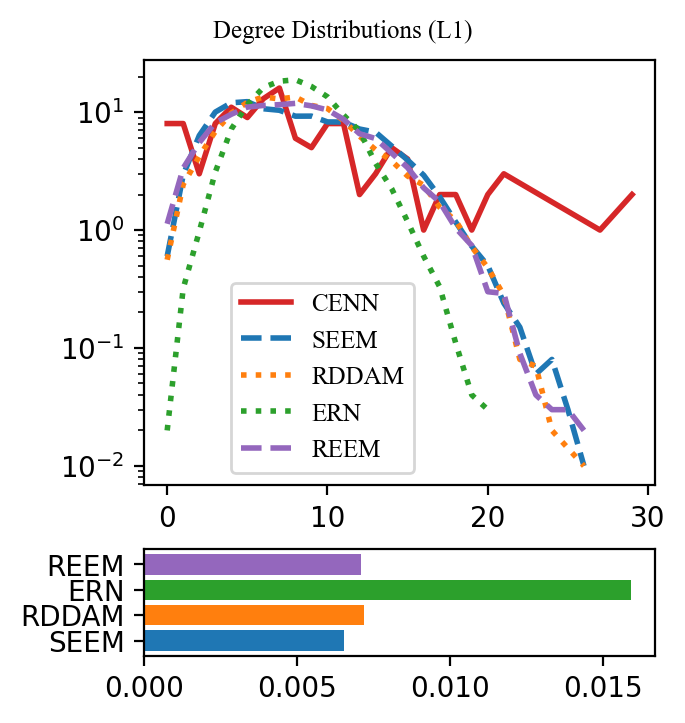

<Figure size 640x480 with 0 Axes>

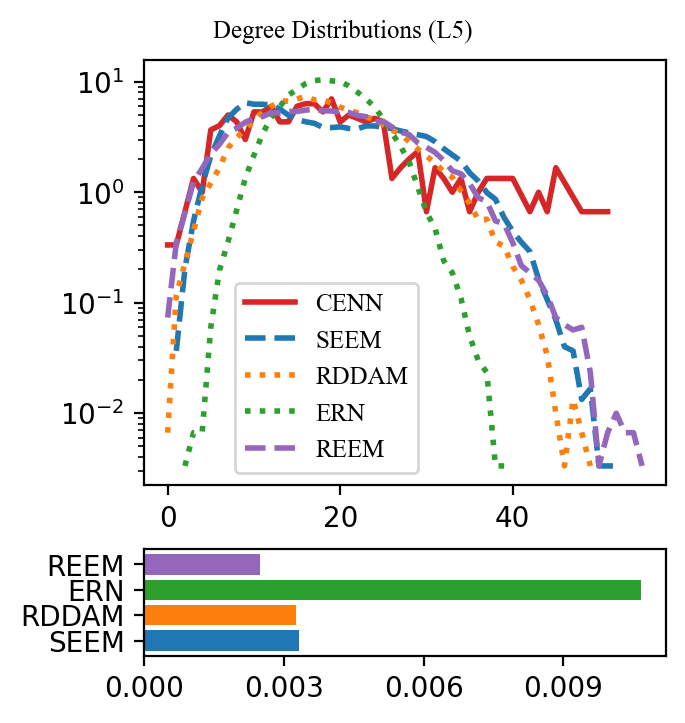

<Figure size 640x480 with 0 Axes>

In [10]:
multiLinePlot(
[degreeSequence(G_W1,title='CENN', presentation=False, subplot=True),
avgDegDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
avgDegDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
avgDegDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True),
avgDegDist(SEEM_Array_Witvliet_Rand[0],title='REEM', presentation=False, subplot=True)#,
],
['CENN','SEEM','RDDAM','ERN', 'REEM'],
title='Degree Distributions (L1)',
figsize=(3.3125, 3.5),
save='data/images/distributions/degreeDist_L1_line.pgf')#,

plt.show()

multiLinePlot(
[avgDegDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
avgDegDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
avgDegDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
avgDegDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True),
avgDegDist(SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand,title='REEM', presentation=False, subplot=True)#,
],
['CENN','SEEM','RDDAM','ERN', 'REEM'],
title='Degree Distributions (L5)',
figsize=(3.3125, 3.5),
save='data/images/distributions/degreeDist_L5_line.pgf')#,

plt.show()

In [9]:



# multiBarPlot([2,3],
# [degreeSequence(G_W1,title='CENN', presentation=False, subplot=True),
# avgDegDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
# avgDegDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
# avgDegDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True)#,
# # avgDegDist(SEEM_Array_Witvliet_Rand[0],title='REEM', presentation=False, subplot=True),
# ],
# ['CENN','SEEM','RDDAM','ERN'],#, 'REEM'],
# title='Degree Distribution (L1)',
# figsize=(10, 7),
# maxX=50,
# maxY=16,
# save='data/images/distributions/degreeDist_W1_Rand_5.png')#,
# # averages= [sum(dict(G_W1.degree()).values())/len(dict(G_W1.degree()).values()),
# # sum(dict(SEEM_Array_Witvliet[0][0].degree()).values())/len(dict(SEEM_Array_Witvliet[0][0].degree()).values()),

# plt.show()

# multiBarPlot([2,3],
# [
# avgDegDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
# avgDegDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
# avgDegDist(RDDAM_Graphs_W8,title='RDDAM', presentation=False, subplot=True),
# avgDegDist(rand_Graphs_W8,title='Erdos-Renyi', presentation=False, subplot=True)#,
# # avgDegDist(SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand,title='REEM', presentation=False, subplot=True)
# ],
# ['CENN','SEEM','RDDAM','ERN'],#, 'REEM'],
# title='Degree Distribution (Adult)',
# figsize=(10, 7),
# maxX=50,
# maxY=16,
# save='data/images/distributions/degreeDist_L5_Rand_5.png')

In [10]:
# # TODO: This needs to be fixed. It incorrectly measures degree of nodes


# fig,axes = plt.subplots(3,1, figsize=(8,9))
# fig.suptitle('Degree Distribution', fontsize=16)

# axes[0].bar(*degreeSequence(G_overlap_W7_W8_White, title='Overlap (all)', presentation=False, subplot=True))
# axes[0].set_title('Overlap (all)')

# axes[1].bar(*degreeSequence(G_2of3, title='Overlap (2/3)', presentation=False, subplot=True))
# axes[1].set_title('Overlap (2/3)')

# axes[2].bar(*degreeSequence(G_1of3, title='Overlap (Unique)', presentation=False, subplot=True))
# axes[2].set_title('Overlap (Unique)')

# for ax in axes:
#   ax.set_xlim([0, 50])
#   ax.set_ylim([0, 20])

# plt.savefig('data/images/overlaps/123/degreeDistribution.png', dpi=300)

### Distance Distribution

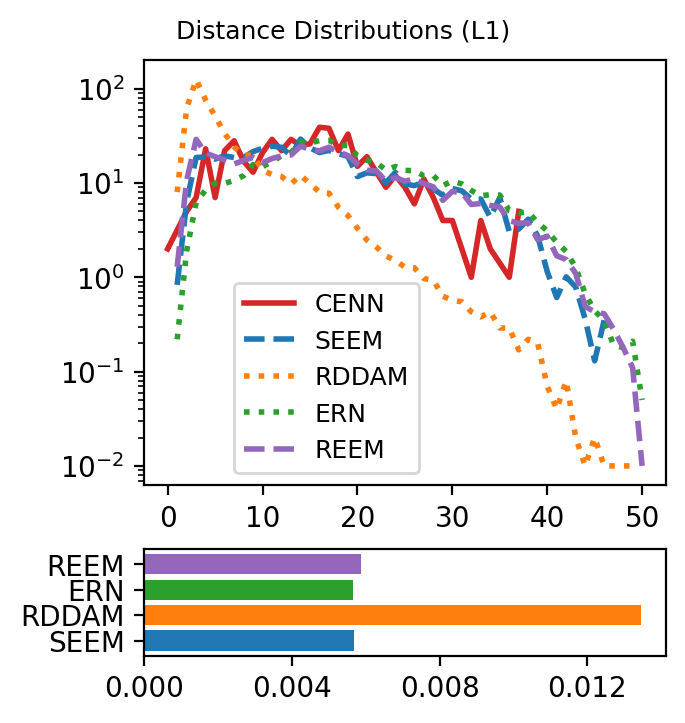

<Figure size 640x480 with 0 Axes>

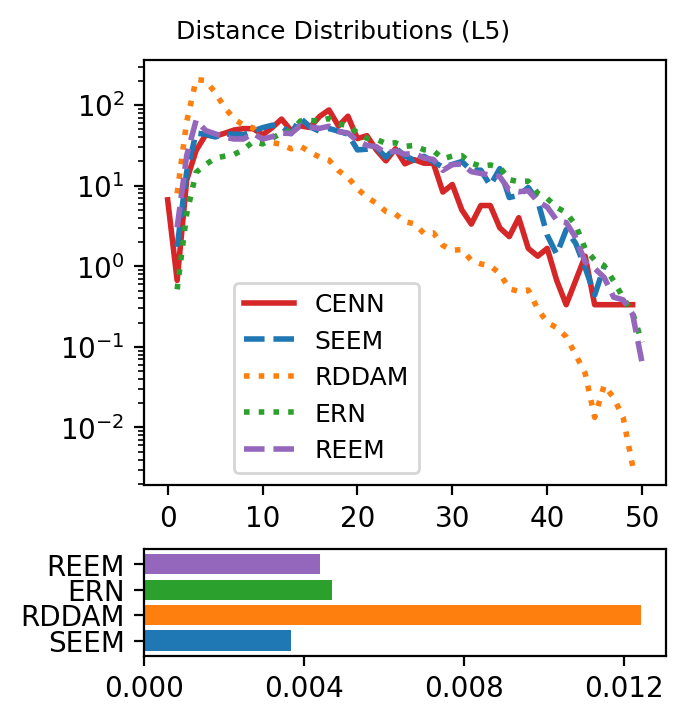

<Figure size 640x480 with 0 Axes>

In [32]:
multiLinePlot(
[distanceSequence(G_W1,title='CENN', presentation=False, subplot=True),
avgDistDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
avgDistDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
avgDistDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True),
avgDistDist(SEEM_Array_Witvliet_Rand[0],title='REEM', presentation=False, subplot=True)
],
['CENN','SEEM','RDDAM','ERN', 'REEM'],
title='Distance Distributions (L1)',
figsize=(3.3125, 3.5),
save='data/images/distributions/distDist_L1_line.pgf')#,

plt.show()

multiLinePlot(
[avgDistDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
avgDistDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
avgDistDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
avgDistDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True),
avgDistDist(SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand,title='REEM', presentation=False, subplot=True)
],
['CENN','SEEM','RDDAM','ERN', 'REEM'],
title='Distance Distributions (L5)',
figsize=(3.3125, 3.5),
save='data/images/distributions/distDist_L5_line.pgf')#,

plt.show()

Distance Distribution Graphs (L5)

In [5]:



# multiBarPlot([2,2],
# [
#   # degreeSequence(G_W8,title='CENN', presentation=False, subplot=True),
# avgDistDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
# avgDistDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
# avgDistDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True)],
# ['CENN','SEEM','RDDAM','ERN'],
# title='Edge-Distance Distribution (Adult)',
# figsize=(10,7),
# maxX=50,
# maxY=150,
# save='data/images/distributions/distDist_W8.png')

Exception: File `'lib/distance.ipynb'` not found.

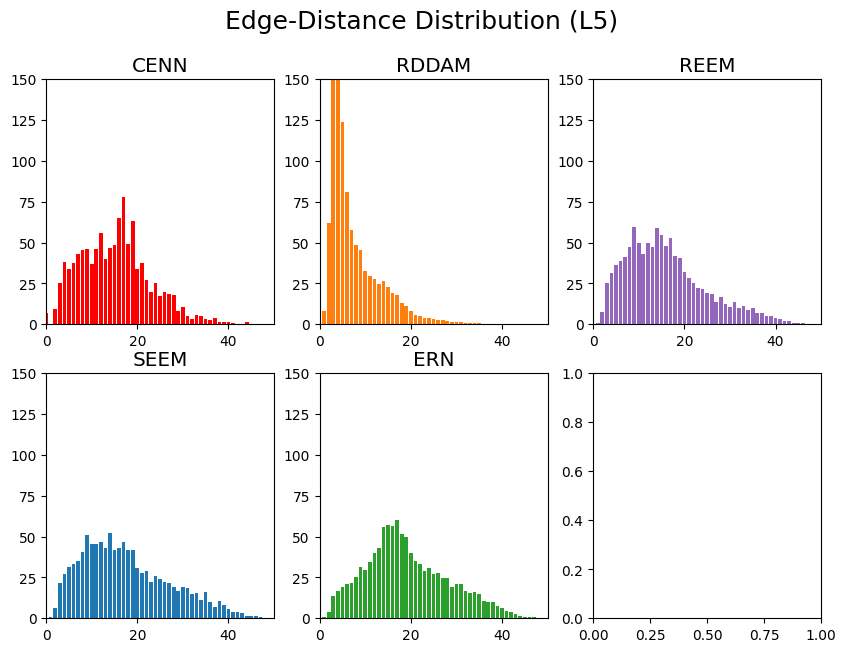

In [23]:


# multiBarPlot([2,3],
# [
# distanceSequence(G_W1,title='CENN', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
# avgDistDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
# avgDistDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet_Rand[0],title='REEM', presentation=False, subplot=True)],
# ['CENN','SEEM','RDDAM','ERN', 'REEM'],
# title='Edge-Distance Distribution (L1)',
# figsize=(10,7),
# maxX=50,
# maxY=80,
# save='data/images/distributions/distDist_W1.png')

# multiBarPlot([2,3],
# [
#   # degreeSequence(G_W8,title='CENN', presentation=False, subplot=True),
# avgDistDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
# avgDistDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
# avgDistDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet_Rand[6] + SEEM_Array_Witvliet_Rand[7] + SEEM_White_Rand,title='Erdos-Renyi', presentation=False, subplot=True)],
# ['CENN','SEEM','RDDAM','ERN', 'REEM'],
# title='Edge-Distance Distribution (L5)',
# figsize=(10,7),
# maxX=50,
# maxY=150,
# save='data/images/stats/distributions/W8.png')

Distance Distribution Graphs (L1)

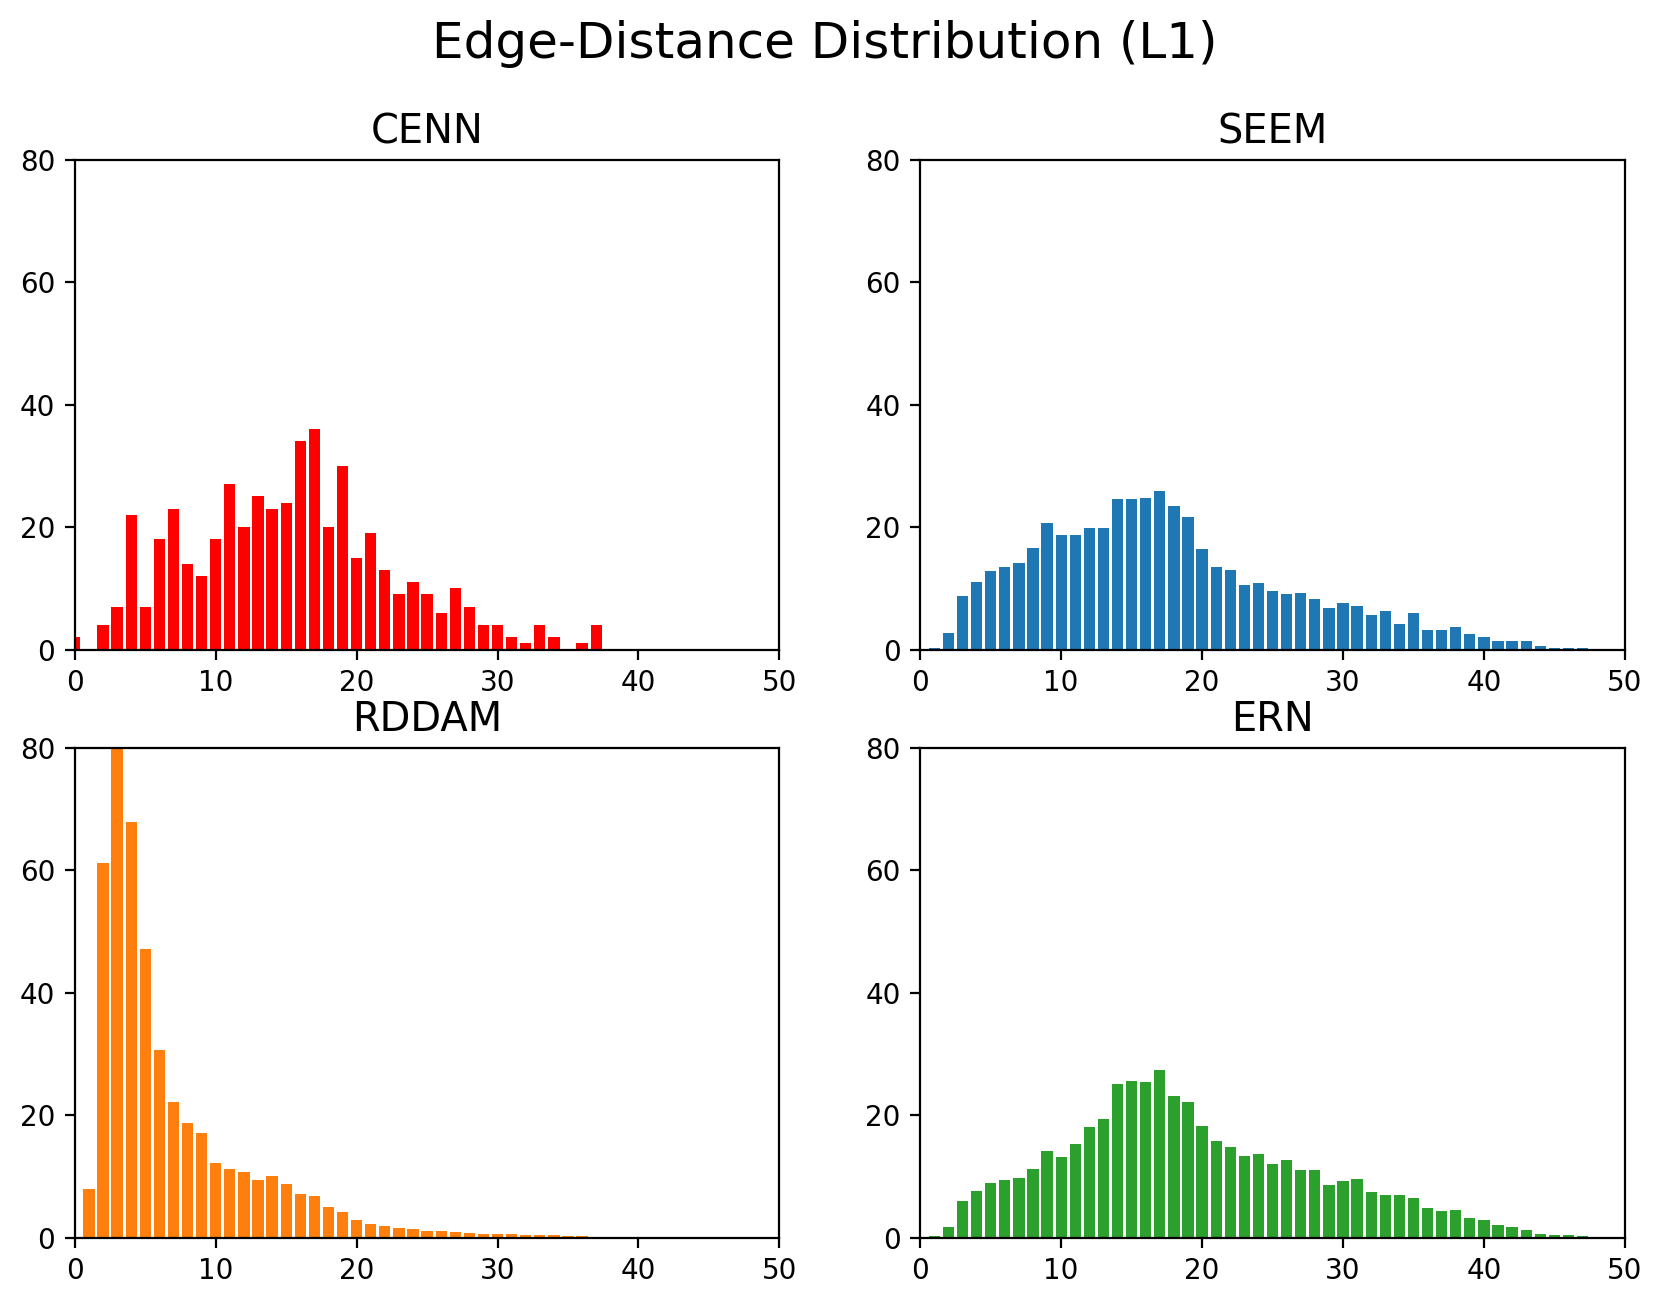

In [67]:
# multiBarPlot([2,2],
# [
# distanceSequence(G_W1,title='CENN', presentation=False, subplot=True),
# avgDistDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
# avgDistDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
# avgDistDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True)],
# ['CENN','SEEM','RDDAM','ERN'],
# title='Edge-Distance Distribution (L1)',
# figsize=(10,7),
# maxX=50,
# maxY=80,
# save='data/images/distributions/distDist_W1.png')

# %run lib/imports.ipynb
# %run lib/plot.ipynb


# distanceSequence(G_W1,title='CENN', presentation=False, subplot=True)
# avgDistDist(SEEM_Array_Witvliet[0],title='SEEM (W1)', presentation=False, subplot=True)
# # avgDistDist(SEEM_Array_Witvliet[7],title='SEEM (W8)', presentation=False)
# avgDistDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True)
# avgDistDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True)

### KL Divergence

In [12]:
distSeqs = {
    'CENN': distanceSequence(G_W1,title='CENN', presentation=False, subplot=True),
    'SEEM': avgDistDist(SEEM_Array_Witvliet[0],title='SEEM (W1)', presentation=False, subplot=True),
    'RDDAM': avgDistDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
    'Erdos-Renyi': avgDistDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True)
}

distributions = createDistributions(distSeqs)

print('KL Divergence for Distance Distributions (W1)')

print('KL(SEEM || CENN)', kl_divergence(distributions['SEEM'], distributions['CENN']))
print('KL(RDDAM || CENN)', kl_divergence(distributions['RDDAM'], distributions['CENN']))
print('KL(Erdos-Renyi || CENN)', kl_divergence(distributions['Erdos-Renyi'], distributions['CENN']))


LEN:  487000
MAX 50
AVG:  17.346030800821357
LEN:  487507
MAX 50
AVG:  6.6129388911338705
LEN:  487767
MAX 50
AVG:  19.15080561005562
KL Divergence for Distance Distributions (W1)
KL(SEEM || CENN) 0.07362876851583132
KL(RDDAM || CENN) 1.15058425130255
KL(Erdos-Renyi || CENN) 0.12435983071533989


In [13]:
print('Wasserstein Distance for Distance Distributions (W1)')
print('Wasserstein Distance between SEEM and CENN', wasserstein_dist(distributions['SEEM'], distributions['CENN']))
print('Wasserstein Distance between RDDAM and CENN', wasserstein_dist(distributions['RDDAM'], distributions['CENN']))
print('Wasserstein Distance between Erdos-Renyi and CENN', wasserstein_dist(distributions['Erdos-Renyi'], distributions['CENN']))

Wasserstein Distance for Distance Distributions (W1)
Wasserstein Distance between SEEM and CENN 0.004112735032411323
Wasserstein Distance between RDDAM and CENN 0.013453382103288083
Wasserstein Distance between Erdos-Renyi and CENN 0.0052290359819001046


In [17]:
distSeqs = {
    'CENN': avgDistDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
    'SEEM': avgDistDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
    'RDDAM': avgDistDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
    'Erdos-Renyi': avgDistDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True)
}

distributions = createDistributions(distSeqs)

print('KL Divergence for Distance Distributions (W8)')

print('KL(SEEM || CENN)', kl_divergence(distributions['SEEM'], distributions['CENN']))
print('KL(RDDAM || CENN)', kl_divergence(distributions['RDDAM'], distributions['CENN']))
print('KL(Erdos-Renyi || CENN)', kl_divergence(distributions['Erdos-Renyi'], distributions['CENN']))

LEN:  3262
MAX 49
AVG:  15.206621704475781
LEN:  3262000
MAX 50
AVG:  17.33455364806867
LEN:  3237948
MAX 50
AVG:  7.420238064354338
LEN:  3263279
MAX 50
AVG:  19.18422788857465
KL Divergence for Distance Distributions (W8)
KL(SEEM || CENN) 0.07610387307413483
KL(RDDAM || CENN) 0.7807455348734075
KL(Erdos-Renyi || CENN) 0.15469568840472253


In [18]:
print('Wasserstein Distance for Distance Distributions (W8)')
print('Wasserstein Distance between SEEM and CENN', wasserstein_dist(distributions['SEEM'], distributions['CENN']))
print('Wasserstein Distance between RDDAM and CENN', wasserstein_dist(distributions['RDDAM'], distributions['CENN']))
print('Wasserstein Distance between Erdos-Renyi and CENN', wasserstein_dist(distributions['Erdos-Renyi'], distributions['CENN']))

Wasserstein Distance for Distance Distributions (W8)
Wasserstein Distance between SEEM and CENN 0.0031754366982844704
Wasserstein Distance between RDDAM and CENN 0.012738764605263419
Wasserstein Distance between Erdos-Renyi and CENN 0.004316728164013454


In [19]:
degSeqs = {
  'CENN': degreeSequence(G_W1,title='CENN', presentation=False, subplot=True),
  'SEEM': avgDegDist(SEEM_Array_Witvliet[0],title='SEEM', presentation=False, subplot=True),
  'RDDAM': avgDegDist(RDDAM_Graphs_W1,title='RDDAM', presentation=False, subplot=True),
  'Erdos-Renyi': avgDegDist(rand_Graphs_W1,title='Erdos-Renyi', presentation=False, subplot=True)
}

distributions = createDistributions(degSeqs)

print('KL Divergence for Degree Distributions (W1)')

print('KL(SEEM || CENN)', kl_divergence(distributions['SEEM'], distributions['CENN']))
print('KL(RDDAM || CENN)', kl_divergence(distributions['RDDAM'], distributions['CENN']))
print('KL(Erdos-Renyi || CENN)', kl_divergence(distributions['Erdos-Renyi'], distributions['CENN']))

24
25
21
KL Divergence for Degree Distributions (W1)
KL(SEEM || CENN) 0.27620474092215974
KL(RDDAM || CENN) 0.19537195809255203
KL(Erdos-Renyi || CENN) 0.39005535115991447


In [20]:
print('Wasserstein Distance for Degree Distributions (W1)')
print('Wasserstein Distance between SEEM and CENN', wasserstein_dist(distributions['SEEM'], distributions['CENN']))
print('Wasserstein Distance between RDDAM and CENN', wasserstein_dist(distributions['RDDAM'], distributions['CENN']))
print('Wasserstein Distance between Erdos-Renyi and CENN', wasserstein_dist(distributions['Erdos-Renyi'], distributions['CENN']))

Wasserstein Distance for Degree Distributions (W1)
Wasserstein Distance between SEEM and CENN 0.006424936386768452
Wasserstein Distance between RDDAM and CENN 0.0051083969465648875
Wasserstein Distance between Erdos-Renyi and CENN 0.01366055979643765


In [21]:
distSeqs = {
    'CENN': avgDegDist([G_W7, G_W8, G_White],title='CENN', presentation=False, subplot=True),
    'SEEM': avgDegDist(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White,title='SEEM', presentation=False, subplot=True),
    'RDDAM': avgDegDist(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White,title='RDDAM', presentation=False, subplot=True),
    'Erdos-Renyi': avgDegDist(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White,title='Erdos-Renyi', presentation=False, subplot=True)
}

distributions = createDistributions(distSeqs)

print('KL Divergence for Degree Distributions (W8)')

print('KL(SEEM || CENN)', kl_divergence(distributions['SEEM'], distributions['CENN']))
print('KL(RDDAM || CENN)', kl_divergence(distributions['RDDAM'], distributions['CENN']))
print('KL(Erdos-Renyi || CENN)', kl_divergence(distributions['Erdos-Renyi'], distributions['CENN']))

44
42
47
38
KL Divergence for Degree Distributions (W8)
KL(SEEM || CENN) 0.15110917464003945
KL(RDDAM || CENN) 0.10191854088440626
KL(Erdos-Renyi || CENN) 0.29888379201441484


In [22]:
print('Wasserstein Distance for Degree Distributions (W8)')
print('Wasserstein Distance between SEEM and CENN', wasserstein_dist(distributions['SEEM'], distributions['CENN']))
print('Wasserstein Distance between RDDAM and CENN', wasserstein_dist(distributions['RDDAM'], distributions['CENN']))
print('Wasserstein Distance between Erdos-Renyi and CENN', wasserstein_dist(distributions['Erdos-Renyi'], distributions['CENN']))

Wasserstein Distance for Degree Distributions (W8)
Wasserstein Distance between SEEM and CENN 0.0031943384223918564
Wasserstein Distance between RDDAM and CENN 0.0025221586089906665
Wasserstein Distance between Erdos-Renyi and CENN 0.009537107718405432


In [ ]:
import matplotlib.pyplot as plt

plt.bar()

Text(0.5, 1.0, 'Unique (W8)')

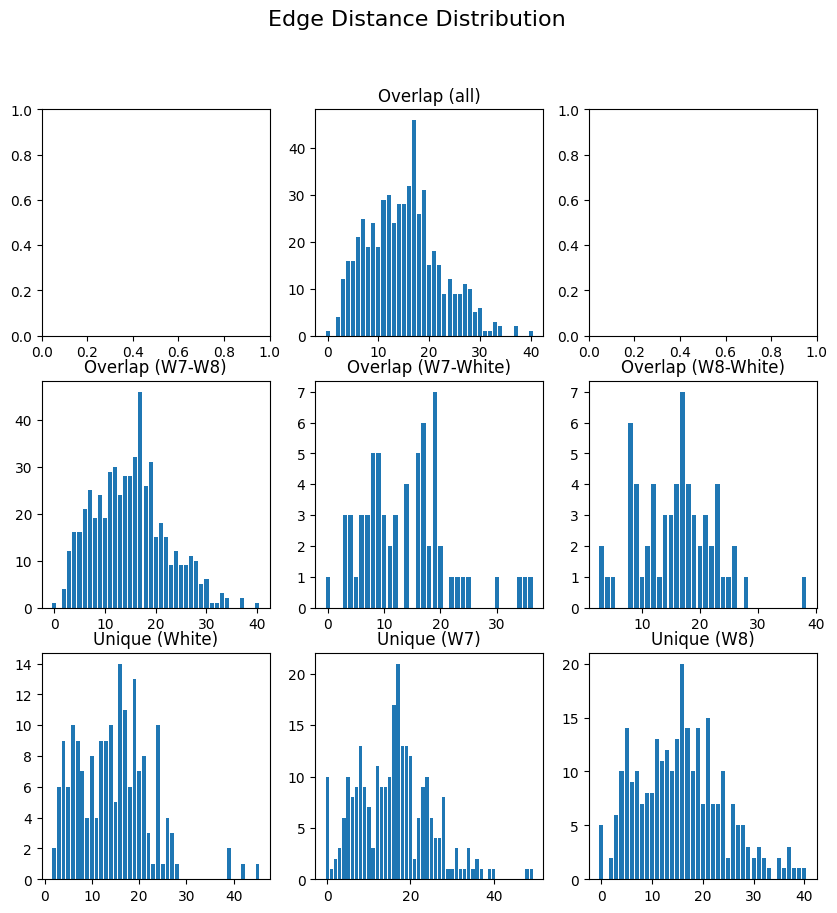

In [12]:
%store -r G_overlap_W7_W8
%store -r G_overlap_W7_White
%store -r G_overlap_W8_White
%store -r G_overlap_W7_W8_White
%store -r G_unique_W7
%store -r G_unique_W8
%store -r G_unique_White

fig,axes = plt.subplots(3,3, figsize=(10,10))
fig.suptitle('Edge Distance Distribution', fontsize=16)

axes[0,1].bar(*distanceSequence(G_overlap_W7_W8_White, title='Overlap (all)', presentation=False, subplot=True))
axes[0,1].set_title('Overlap (all)')

axes[1,0].bar(*distanceSequence(G_overlap_W7_W8, title='Overlap (W7-W8)', presentation=False, subplot=True))
axes[1,0].set_title('Overlap (W7-W8)')
axes[1,1].bar(*distanceSequence(G_overlap_W7_White, title='Overlap (W7-White)', presentation=False, subplot=True))
axes[1,1].set_title('Overlap (W7-White)')
axes[1,2].bar(*distanceSequence(G_overlap_W8_White, title='Overlap (W8-White)', presentation=False, subplot=True))
axes[1,2].set_title('Overlap (W8-White)')

axes[2,0].bar(*distanceSequence(G_unique_White, title='Unique (White)', presentation=False, subplot=True))
axes[2,0].set_title('Unique (White)')
axes[2,1].bar(*distanceSequence(G_unique_W7, title='Unique (W7)', presentation=False, subplot=True))
axes[2,1].set_title('Unique (W7)')
axes[2,2].bar(*distanceSequence(G_unique_W8, title='Unique (W8)', presentation=False, subplot=True))
axes[2,2].set_title('Unique (W8)')

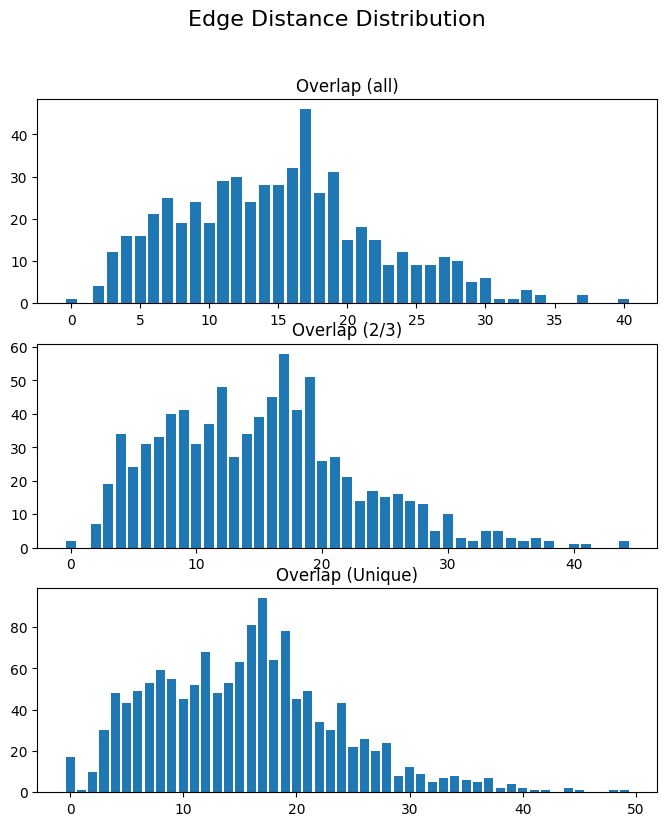

In [12]:

multiBarPlot([3,1], 
[
  distanceSequence(G_overlap_W7_W8_White, title='Overlap (all)', presentation=False, subplot=True), 
  distanceSequence(G_2of3, title='Overlap (2/3)', presentation=False, subplot=True),
  distanceSequence(G_1of3, title='Overlap (Unique)', presentation=False, subplot=True)
], 
['Overlap (all)', 'Overlap (2/3)', 'Overlap (Unique)'], 
'Edge Distance Distribution', 
figsize=(8,9),
save='data/images/overlaps/123/distDistribution.png')


In [14]:
distanceSequence(G_overlap_W7_W8_White, title='Overlap (all)', presentation=False, subplot=True)

(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        37, 40]),
 array([ 1,  4, 12, 16, 16, 21, 25, 19, 24, 19, 29, 30, 24, 28, 28, 32, 46,
        26, 31, 15, 18, 15,  9, 12,  9,  9, 11, 10,  5,  6,  1,  1,  3,  2,
         2,  1]))

# Distance Distributions of Bidirectional Subgraph

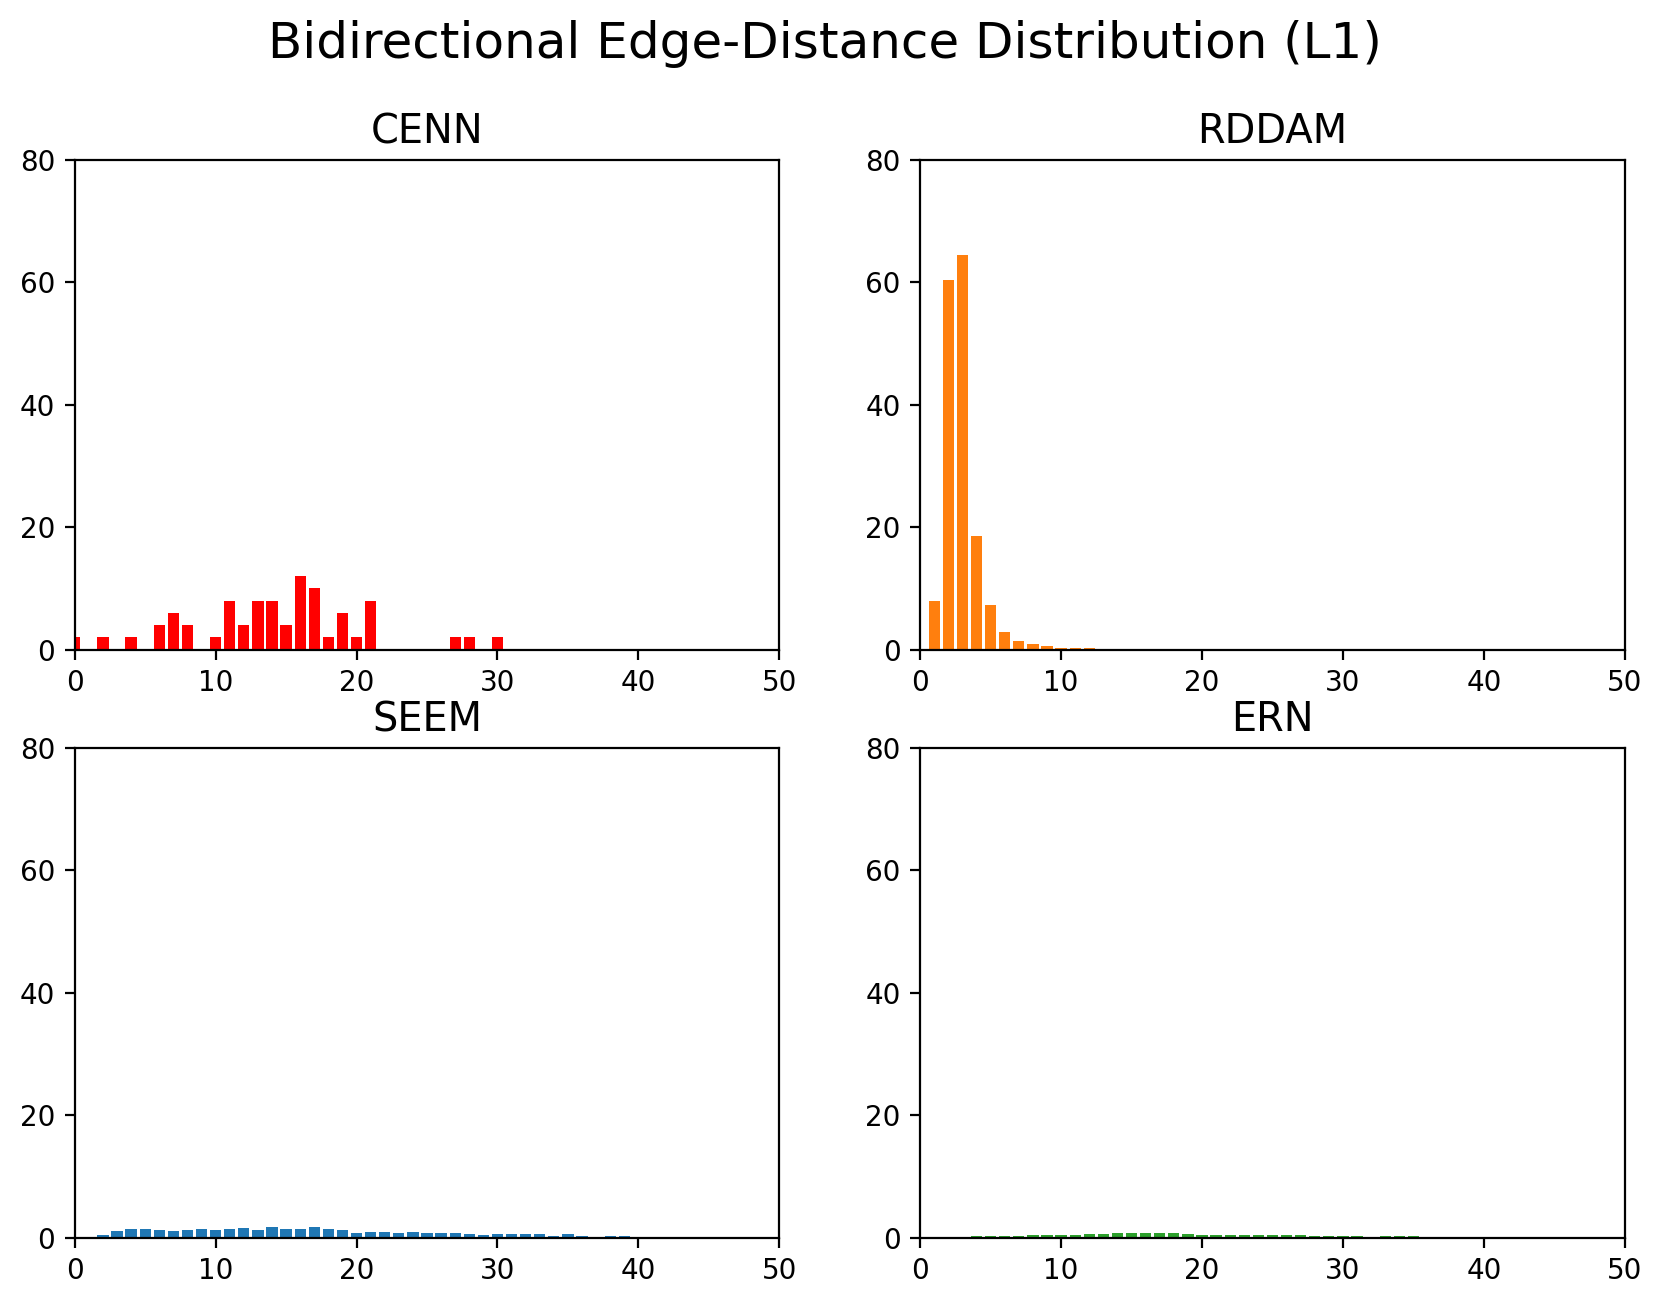

In [5]:
multiBarPlot([2,2],
[
distanceSequence(bidirectionalSubgraph(G_W1),title='CENN', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(SEEM_Array_Witvliet[0]),title='SEEM', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(RDDAM_Graphs_W1),title='RDDAM', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(rand_Graphs_W1),title='Erdos-Renyi', presentation=False, subplot=True)],
['CENN','SEEM','RDDAM','ERN'],
title='Bidirectional Edge-Distance Distribution (L1)',
figsize=(10,7),
maxX=50,
maxY=80,
save='data/images/distributions/bidistDist_W1.png')



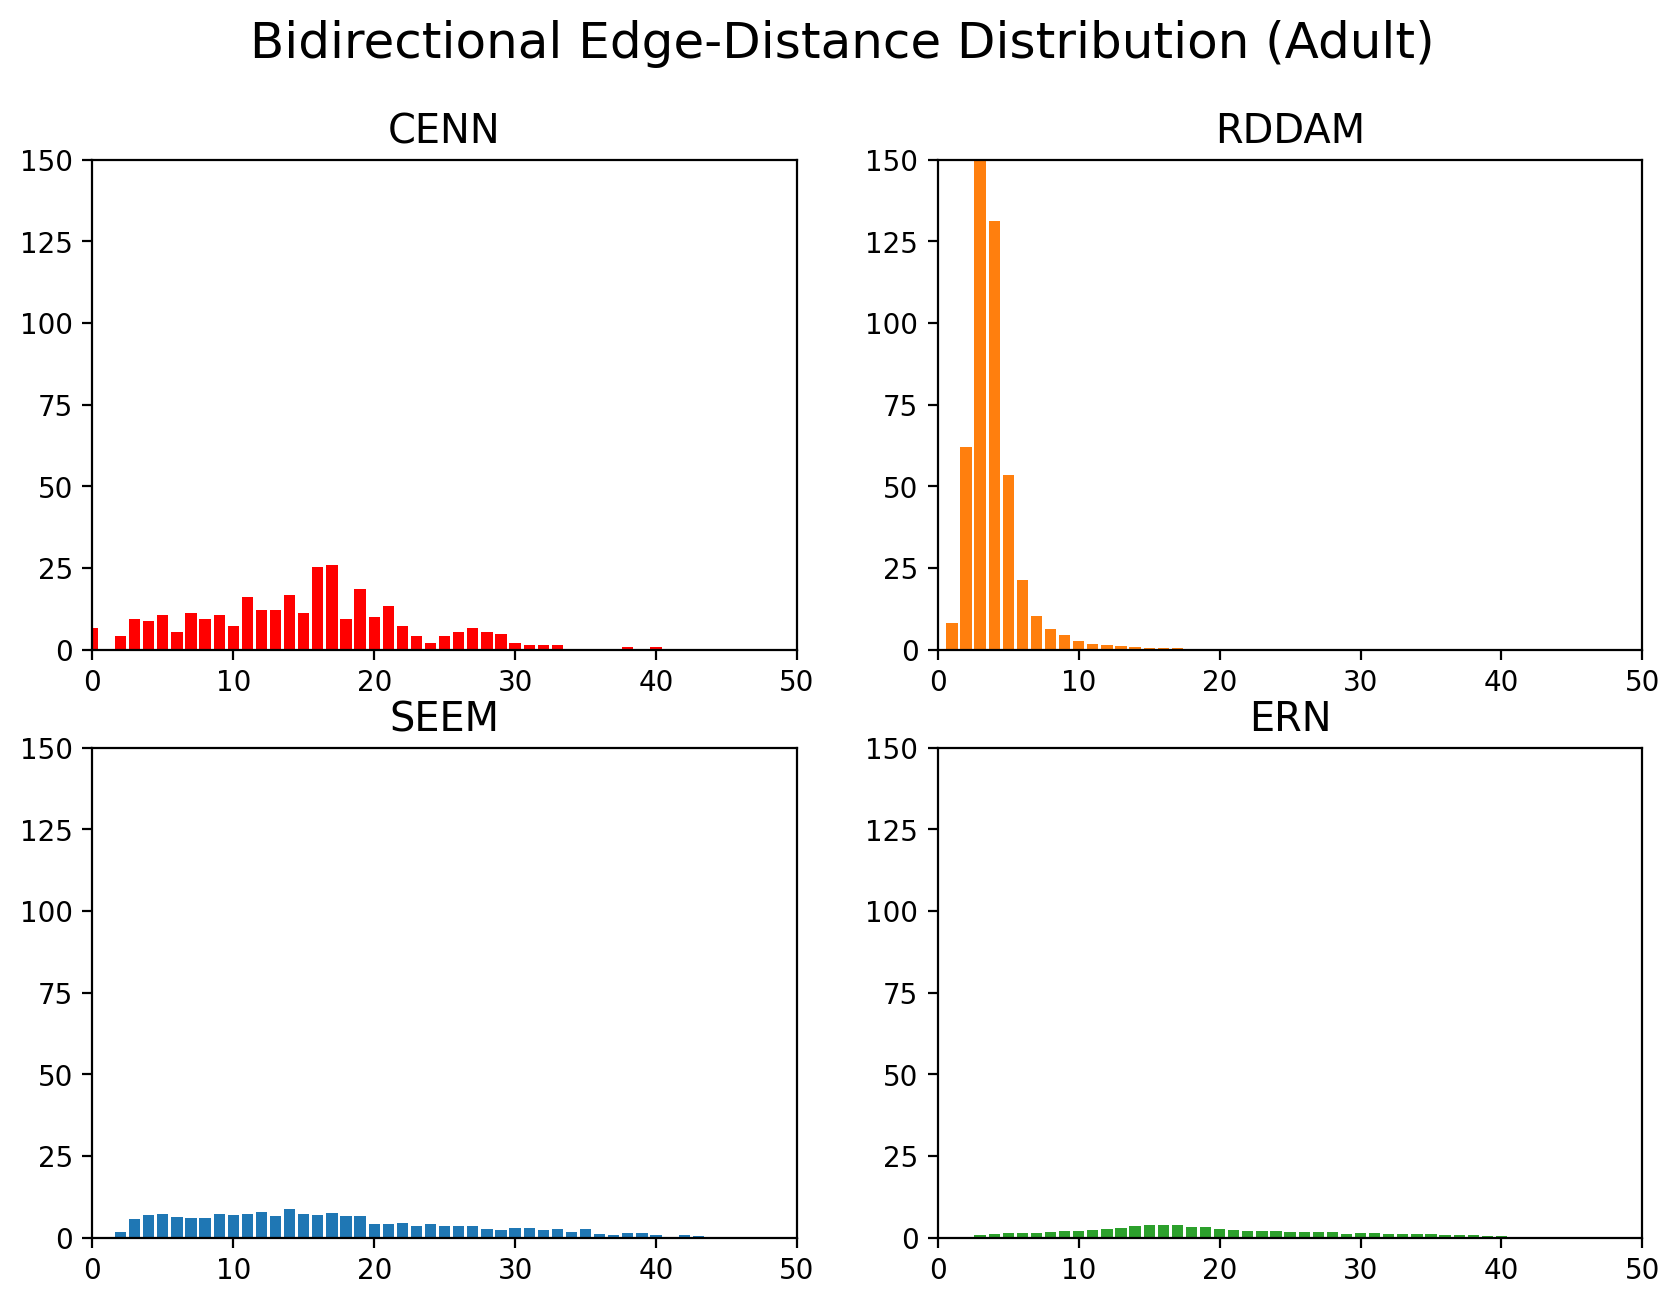

In [6]:
multiBarPlot([2,2],
[
  # degreeSequence(G_W8,title='CENN', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray([G_W7, G_W8, G_White]),title='CENN', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White),title='SEEM', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White),title='RDDAM', presentation=False, subplot=True),
avgDistDist(bidirectionalSubgraphArray(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White),title='Erdos-Renyi', presentation=False, subplot=True)],
['CENN','SEEM','RDDAM','ERN'],
title='Bidirectional Edge-Distance Distribution (Adult)',
figsize=(10,7),
maxX=50,
maxY=150,
save='data/images/distributions/bidistDist_W8.png')

In [16]:
L1_Dict = {
  'CENN': bidirectionalSubgraph(G_W1),
  'SEEM': bidirectionalSubgraphArray(SEEM_Array_Witvliet[0]),
  'RDDAM': bidirectionalSubgraphArray(RDDAM_Graphs_W1),
  'ERN': bidirectionalSubgraphArray(rand_Graphs_W1)
}

L5_Dict = {
  'CENN': bidirectionalSubgraphArray([G_W7, G_W8, G_White]),
  'SEEM': bidirectionalSubgraphArray(SEEM_Array_Witvliet[6] + SEEM_Array_Witvliet[7] + SEEM_White),
  'RDDAM': bidirectionalSubgraphArray(RDDAM_Graphs_W7 + RDDAM_Graphs_W8 + RDDAM_Graphs_White),
  'ERN': bidirectionalSubgraphArray(rand_Graphs_W7 + rand_Graphs_W8 + rand_Graphs_White)
}

def getSequences(data, measure):
  if type(measure) == list:
    return {
      'CENN': measure[0](data['CENN'],title='CENN', presentation=False, subplot=True),
      'SEEM': measure[1](data['SEEM'],title='SEEM', presentation=False, subplot=True),
      'RDDAM': measure[1](data['RDDAM'],title='RDDAM', presentation=False, subplot=True),
      'ERN': measure[1](data['ERN'],title='ERN', presentation=False, subplot=True)
    }
  return {
    'CENN': measure(data['CENN'],title='CENN', presentation=False, subplot=True),
    'SEEM': measure(data['SEEM'],title='SEEM', presentation=False, subplot=True),
    'RDDAM': measure(data['RDDAM'],title='RDDAM', presentation=False, subplot=True),
    'ERN': measure(data['ERN'],title='ERN', presentation=False, subplot=True)
  }

bidistSeqs_L1 = getSequences(L1_Dict, [distanceSequence, avgDistDist])
bidistSeqs_L5 = getSequences(L5_Dict, avgDistDist)


In [17]:
from scipy.stats import wasserstein_distance
from lib.style import color

def wassersteinDistances(seq, measure, version):
  distributions = createDistributions(seq)
  keys = ['SEEM', 'RDDAM', 'ERN']

  wass = [wasserstein_distance(distributions[k],distributions['CENN']) for k in keys]

  plt.clf()
  plt.rcParams.update({'font.size': 6})
  plt.figure(figsize=(3, 4))
  plt.title(f'Wasserstein Distances from CENN Bidirectional Edge {measure} Distribution ({version})', fontsize=6)
  plt.bar(keys, wass, color=[color[k] for k in keys])
  plt.savefig(f'data/images/compareDistributions/wassersteinDistances_{measure}_{version}_3.png', dpi=300)
  plt.show()
  # print(f'''Wasserstein Distances for {measure} Distributions ({version})
  #   SEEM-CENN: {wasserstein_dist(distributions['SEEM'],distributions['CENN'])}
  #   RDDAM-CENN: {wasserstein_dist(distributions['RDDAM'],distributions['CENN'])}
  #   ERN-CENN: {wasserstein_dist(distributions['ERN'],distributions['CENN'])}
  # ''')


<Figure size 640x480 with 0 Axes>

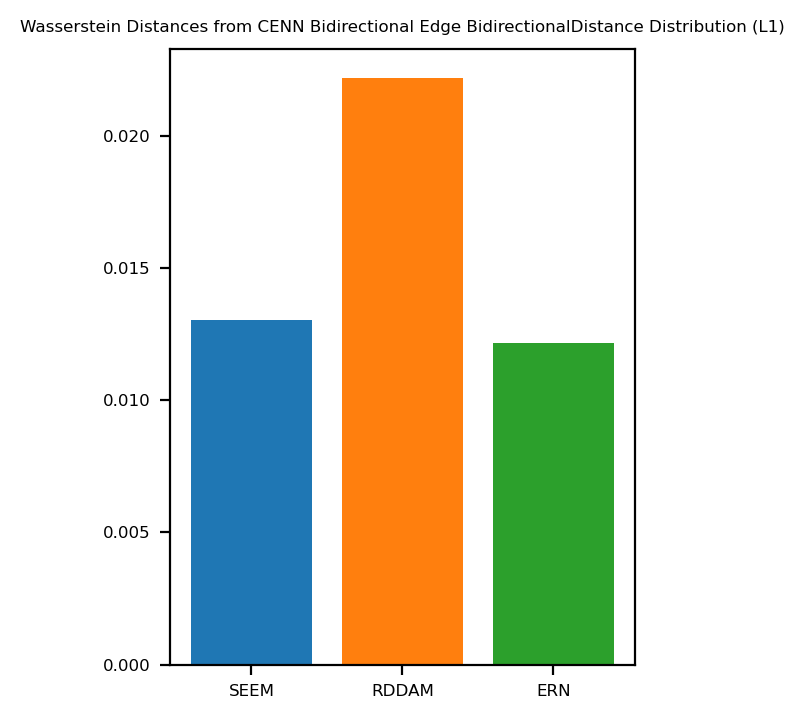

<Figure size 640x480 with 0 Axes>

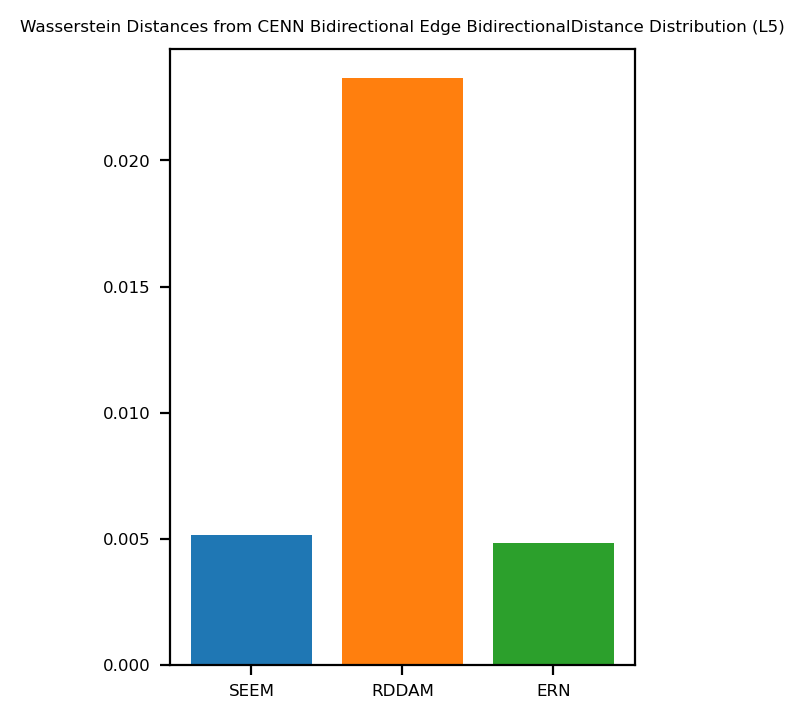

In [18]:
wassersteinDistances(bidistSeqs_L1, 'BidirectionalDistance', 'L1')
wassersteinDistances(bidistSeqs_L5, 'BidirectionalDistance', 'L5')